# **MobileNet with Keras**

MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection, and other common tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

## **Download a MobileNet model**
We first make a call to tf.keras.applications.mobilenet.MobileNet() to obtain a copy of a single pretrained MobileNet with weights that were saved from being trained on ImageNet images. We’re assigning this model to the variable mobile.

In [48]:
mobile = tf.keras.applications.mobilenet.MobileNet()

## **Preprocessing of the image**
The is to process the image to get it in a format that the model expects.


In [53]:
def prepare_image(file):
    img_path = '' # defining the relative path
    #load_img() returns an instance of a PIL image.
    img = image.load_img(img_path + file, target_size=(224, 224)) #(224,224) is the default size for MobileNet).
    img_array = image.img_to_array(img) #convert the PIL image into an array 
    img_array_expanded_dims = np.expand_dims(img_array, axis=0) #expand the dimensions of that array
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims) #preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on. Specifically, it’s scaling the pixel values in the image between -1 and 1, and this function will return the preprocessed image data as a numpy array.

## **Predicting With MobileNet**
Let's see if this model can predict different dog breeds correctly.

### 1.**Husky**

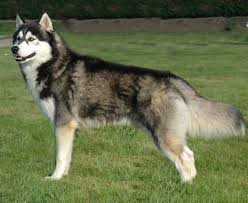

In [60]:
from IPython.display import Image
Image('/content/drive/MyDrive/1.jpg', width=300,height=200)

In [61]:
preprocessed_image = prepare_image('/content/drive/MyDrive/1.jpg')
predictions = mobile.predict(preprocessed_image)

In [62]:
results = imagenet_utils.decode_predictions(predictions) #It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability.
results

[[('n02110185', 'Siberian_husky', 0.4574655),
  ('n02109961', 'Eskimo_dog', 0.3544884),
  ('n02110063', 'malamute', 0.18268324),
  ('n02091467', 'Norwegian_elkhound', 0.0027045475),
  ('n02114712', 'red_wolf', 0.000541704)]]

### 2.**Malamute**

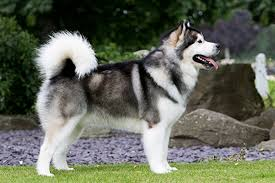

In [68]:
from IPython.display import Image
Image('/content/drive/MyDrive/2.jpg', width=300,height=200)

In [69]:
preprocessed_image = prepare_image('/content/drive/MyDrive/2.jpg')
predictions = mobile.predict(preprocessed_image)

In [70]:
results = imagenet_utils.decode_predictions(predictions) #It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability.
results

[[('n02110063', 'malamute', 0.6646695),
  ('n02109961', 'Eskimo_dog', 0.18403423),
  ('n02091467', 'Norwegian_elkhound', 0.08003064),
  ('n02110185', 'Siberian_husky', 0.07077081),
  ('n02112350', 'keeshond', 0.00037653683)]]

### 3. **Golden Retriver**

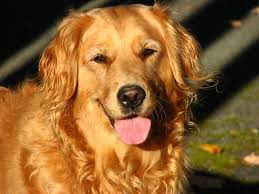

In [71]:
from IPython.display import Image
Image('/content/drive/MyDrive/3.jpg', width=300,height=200)

In [72]:
preprocessed_image = prepare_image('/content/drive/MyDrive/3.jpg')
predictions = mobile.predict(preprocessed_image)

In [73]:
results = imagenet_utils.decode_predictions(predictions) #It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability.
results

[[('n02099601', 'golden_retriever', 0.9984137),
  ('n02100877', 'Irish_setter', 0.0010598405),
  ('n02102318', 'cocker_spaniel', 0.00016101205),
  ('n02100735', 'English_setter', 8.190106e-05),
  ('n02091831', 'Saluki', 5.2965304e-05)]]

### 4. **Pug**

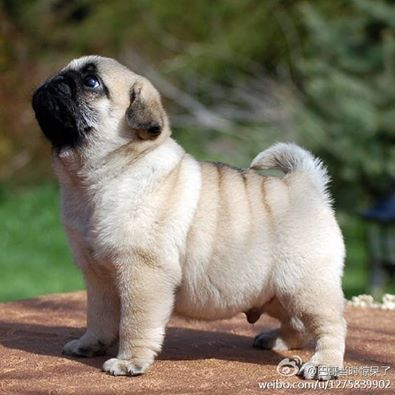

In [75]:
from IPython.display import Image
Image('/content/drive/MyDrive/4.jpg', width=300,height=300)

In [76]:
preprocessed_image = prepare_image('/content/drive/MyDrive/4.jpg')
predictions = mobile.predict(preprocessed_image)

In [77]:
results = imagenet_utils.decode_predictions(predictions) #It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability.
results

[[('n02110958', 'pug', 0.7409717),
  ('n02086079', 'Pekinese', 0.07781251),
  ('n02112706', 'Brabancon_griffon', 0.061770875),
  ('n02111129', 'Leonberg', 0.02699015),
  ('n02098413', 'Lhasa', 0.018542895)]]